In [116]:
# import libraries 
import pandas as pd
import matplotlib.pyplot as plt
import sys
from pathlib import Path
import seaborn as sns

# Add 'src' to the system path
sys.path.append(str(Path().resolve() / 'src'))
from src.data.process_data import create_tmdb_dataset
from src.utils.load_data import load_raw_data
from src.utils.data_utils import *
from src.utils.plot_utils import *
from src.models.empath_model import *
import json

In [4]:
df = create_tmdb_dataset('data/processed/TMDB_clean.csv')
df.head()

,title,release_date,revenue,runtime,budget,original_language,overview,genres,production_companies,production_countries,spoken_languages,keywords,release_year,dvd_era
0,inception,2010-07-15,825532764,148,160000000,en,"cobb, a skilled thief who commits corporate es...","[action, science fiction, adventure]","[legendary pictures, syncopy, warner bros. pic...","[united kingdom, united states of america]","[english, french, japanese, swahili]","[rescue, mission, dream, airplane, paris, fran...",2010,during
1,interstellar,2014-11-05,701729206,169,165000000,en,the adventures of a group of explorers who mak...,"[adventure, drama, science fiction]","[legendary pictures, syncopy, lynda obst produ...","[united kingdom, united states of america]",[english],"[rescue, future, spacecraft, race against time...",2014,post
2,the dark knight,2008-07-16,1004558444,152,185000000,en,batman raises the stakes in his war on crime. ...,"[drama, action, crime, thriller]","[dc comics, legendary pictures, syncopy, isobe...","[united kingdom, united states of america]","[english, mandarin]","[joker, sadism, chaos, secret identity, crime ...",2008,during
3,avatar,2009-12-15,2923706026,162,237000000,en,"in the 22nd century, a paraplegic marine is di...","[action, adventure, fantasy, science fiction]","[dune entertainment, lightstorm entertainment,...","[united states of america, united kingdom]","[english, spanish]","[future, society, culture clash, space travel,...",2009,during
4,the avengers,2012-04-25,1518815515,143,220000000,en,when an unexpected enemy emerges and threatens...,"[science fiction, action, adventure]",[marvel studios],[united states of america],"[english, hindi, russian]","[new york city, superhero, shield, based on co...",2012,during


In [5]:
mean_budgets = df[df.budget > 0].groupby('release_year').agg(mean_budget = ('budget', 'mean'))
df['prod_type'] = df.apply(categorize_production, axis=1, args=(mean_budgets,))

In [6]:
df['dvd_era'] = pd.Categorical(df['dvd_era'], categories=['pre', 'during', 'post'], ordered=True)
df['prod_type'] = pd.Categorical(df['prod_type'], categories=['Independent', 'Small', 'Big', 'Super'], ordered=True)

# Production types

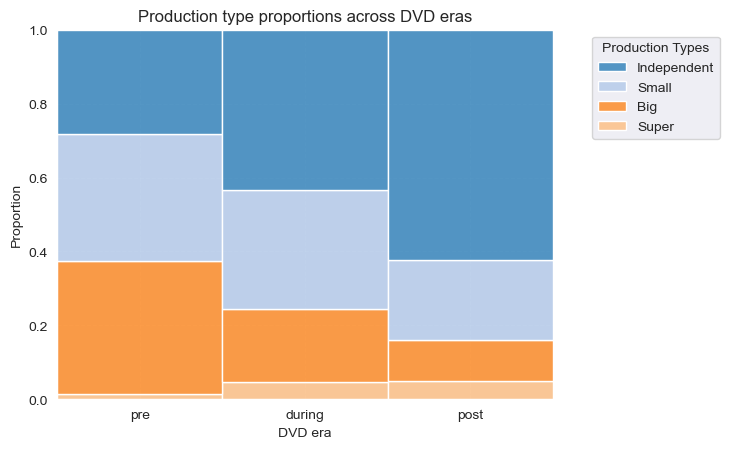

In [7]:
fig = sns.histplot(data = df[df.budget > 0], x='dvd_era', hue='prod_type', 
             multiple='fill', palette='tab20', )
sns.move_legend(fig, loc='upper right', bbox_to_anchor=(1.35,1),title='Production Types')
style_plot('Production type proportions across DVD eras', 'DVD era', 'Proportion')


# Genres and Topics analysis

In [8]:
df_genres = df[df.genres.apply(lambda x: len(x) > 0)].copy()
df_genres = df_genres.explode('genres')
df_genres.head()

,title,release_date,revenue,runtime,budget,original_language,overview,genres,production_companies,production_countries,spoken_languages,keywords,release_year,dvd_era,prod_type
0,inception,2010-07-15,825532764,148,160000000,en,"cobb, a skilled thief who commits corporate es...",action,"[legendary pictures, syncopy, warner bros. pic...","[united kingdom, united states of america]","[english, french, japanese, swahili]","[rescue, mission, dream, airplane, paris, fran...",2010,during,Super
0,inception,2010-07-15,825532764,148,160000000,en,"cobb, a skilled thief who commits corporate es...",science fiction,"[legendary pictures, syncopy, warner bros. pic...","[united kingdom, united states of america]","[english, french, japanese, swahili]","[rescue, mission, dream, airplane, paris, fran...",2010,during,Super
0,inception,2010-07-15,825532764,148,160000000,en,"cobb, a skilled thief who commits corporate es...",adventure,"[legendary pictures, syncopy, warner bros. pic...","[united kingdom, united states of america]","[english, french, japanese, swahili]","[rescue, mission, dream, airplane, paris, fran...",2010,during,Super
1,interstellar,2014-11-05,701729206,169,165000000,en,the adventures of a group of explorers who mak...,adventure,"[legendary pictures, syncopy, lynda obst produ...","[united kingdom, united states of america]",[english],"[rescue, future, spacecraft, race against time...",2014,post,Super
1,interstellar,2014-11-05,701729206,169,165000000,en,the adventures of a group of explorers who mak...,drama,"[legendary pictures, syncopy, lynda obst produ...","[united kingdom, united states of america]",[english],"[rescue, future, spacecraft, race against time...",2014,post,Super


In [9]:
df_genres = df_genres[df_genres.budget > 0]

In [149]:
genre_proportions = get_proportions(df_genres, base_vars=['prod_type', 'dvd_era'], target_var='genres')

# for website: 
# genre_proportions = pd.read_csv('data/processed/genre_proportions.csv', index_col=0)

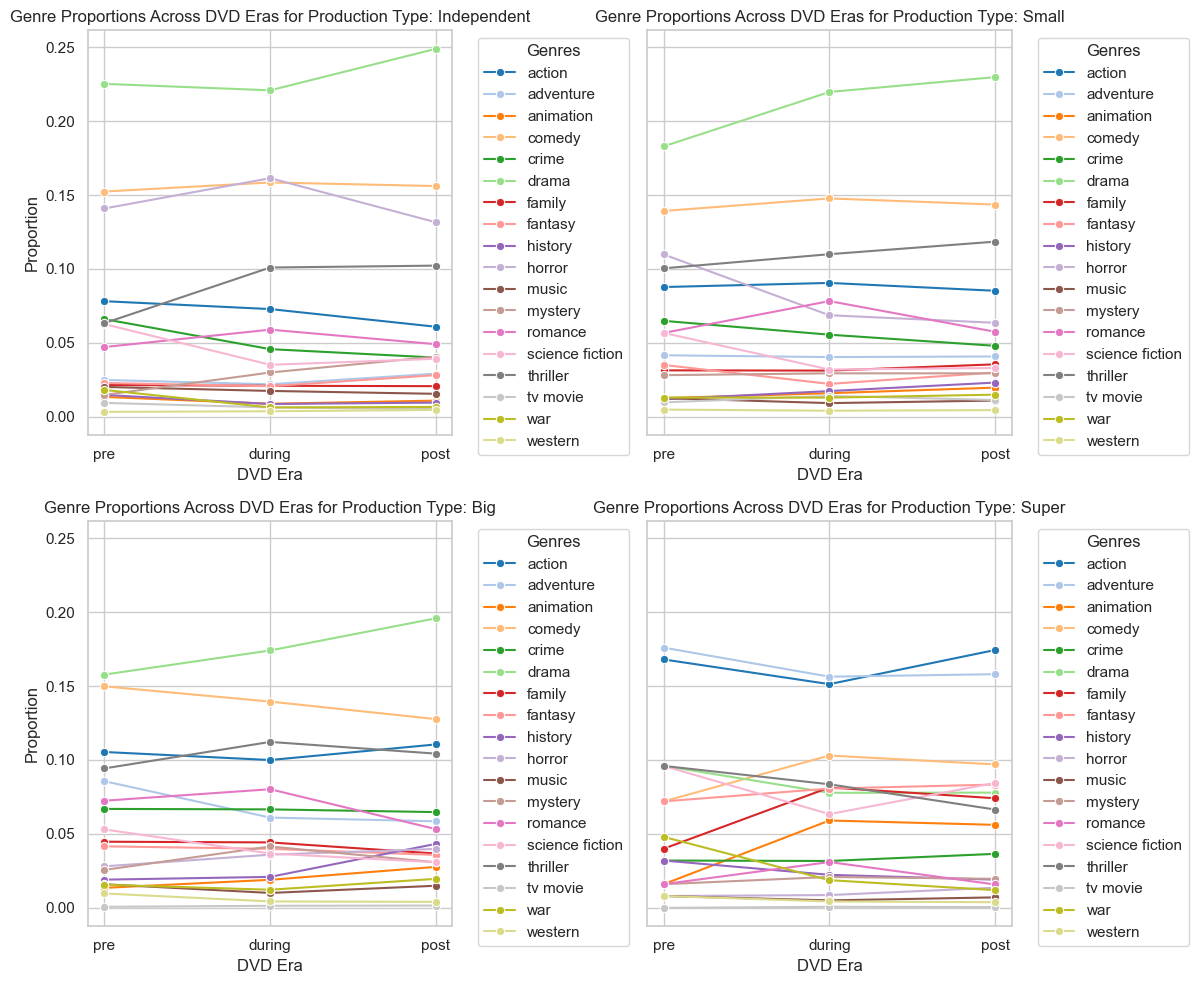

In [150]:
sns.set(style="whitegrid")
f, axs = plt.subplots(2, 2, figsize=(12, 10), sharey=True)
# Loop through each production type
for i, prod_type in enumerate(genre_proportions['prod_type'].unique()):
    subset = genre_proportions[genre_proportions['prod_type'] == prod_type]

    ax = axs.flatten()[i]
    sns.lineplot(data=subset, x='dvd_era', y='prop', hue='genres', marker='o', ax=ax, palette='tab20')
    ax.set_title(f"Genre Proportions Across DVD Eras for Production Type: {prod_type}")
    ax.set_xlabel('DVD Era')
    ax.set_ylabel('Proportion')
    
    ax.legend(title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()

plt.show()

In [32]:
grouped_genres = genre_proportions.groupby(['prod_type', 'genres'], observed=False).sum('count').reset_index()
grouped_genres['proportion'] = grouped_genres['count'] / grouped_genres['total']

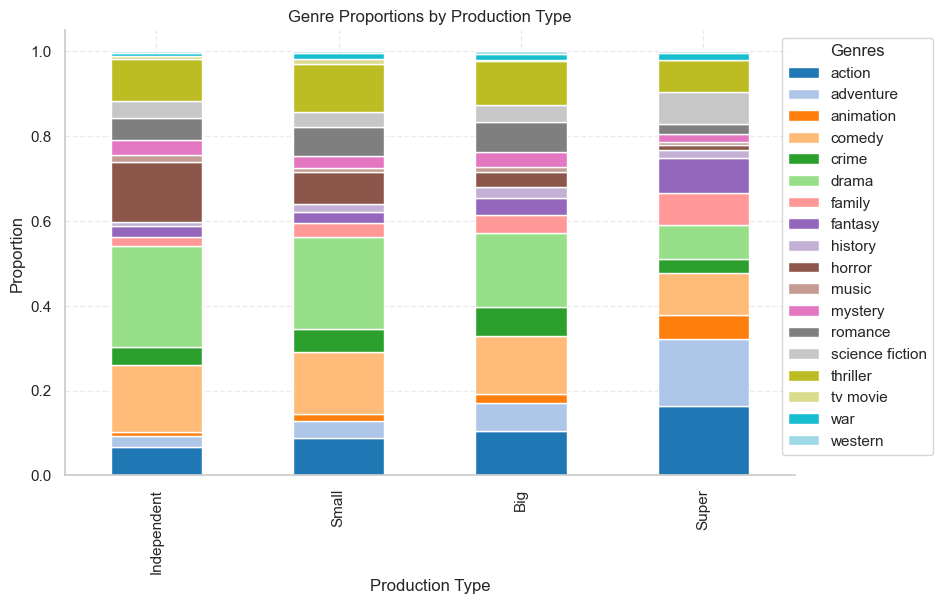

In [42]:
# Pivot the DataFrame
pivot_df = grouped_genres.pivot_table(index='prod_type', columns='genres', values='proportion', fill_value=0, observed=False)

pivot_df.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='tab20')
plt.tight_layout()
plt.legend(title="Genres", bbox_to_anchor=(1.2, 1), loc='upper right')
style_plot("Genre Proportions by Production Type", "Production Type", "Proportion")

## Topics extraction

In [43]:
df_genres['clean_overview'] = df_genres.overview.apply(clean_text)

In [83]:
empathModel = EmpathModel()
selected_genres = ['drama', 'comedy', 'action', 'adventure']
prod_types = ['Independent', 'Small', 'Big', 'Super']
results = empathModel.get_features_genres_prods(df_genres, selected_genres, prod_types)

# for website: 
# results = pd.read_csv('./data/website_data/topics_per_genre_prod.csv')

Extracting features for Independent drama movies
Extracting features for Small drama movies
Extracting features for Big drama movies
Extracting features for Super drama movies
Extracting features for Independent comedy movies
Extracting features for Small comedy movies
Extracting features for Big comedy movies
Extracting features for Super comedy movies
Extracting features for Independent action movies
Extracting features for Small action movies
Extracting features for Big action movies
Extracting features for Super action movies
Extracting features for Independent adventure movies
Extracting features for Small adventure movies
Extracting features for Big adventure movies
Extracting features for Super adventure movies


In [84]:
results.head()

,prod_type,genre,word,era,factor
0,Independent,drama,home,pre,0.022075
1,Independent,drama,children,pre,0.042531
2,Independent,drama,death,pre,0.023694
3,Independent,drama,party,pre,0.015158
4,Independent,drama,friends,pre,0.022222


In [85]:
#results.to_csv('./data/website_data/topics_per_genre_prod.csv', index=False)

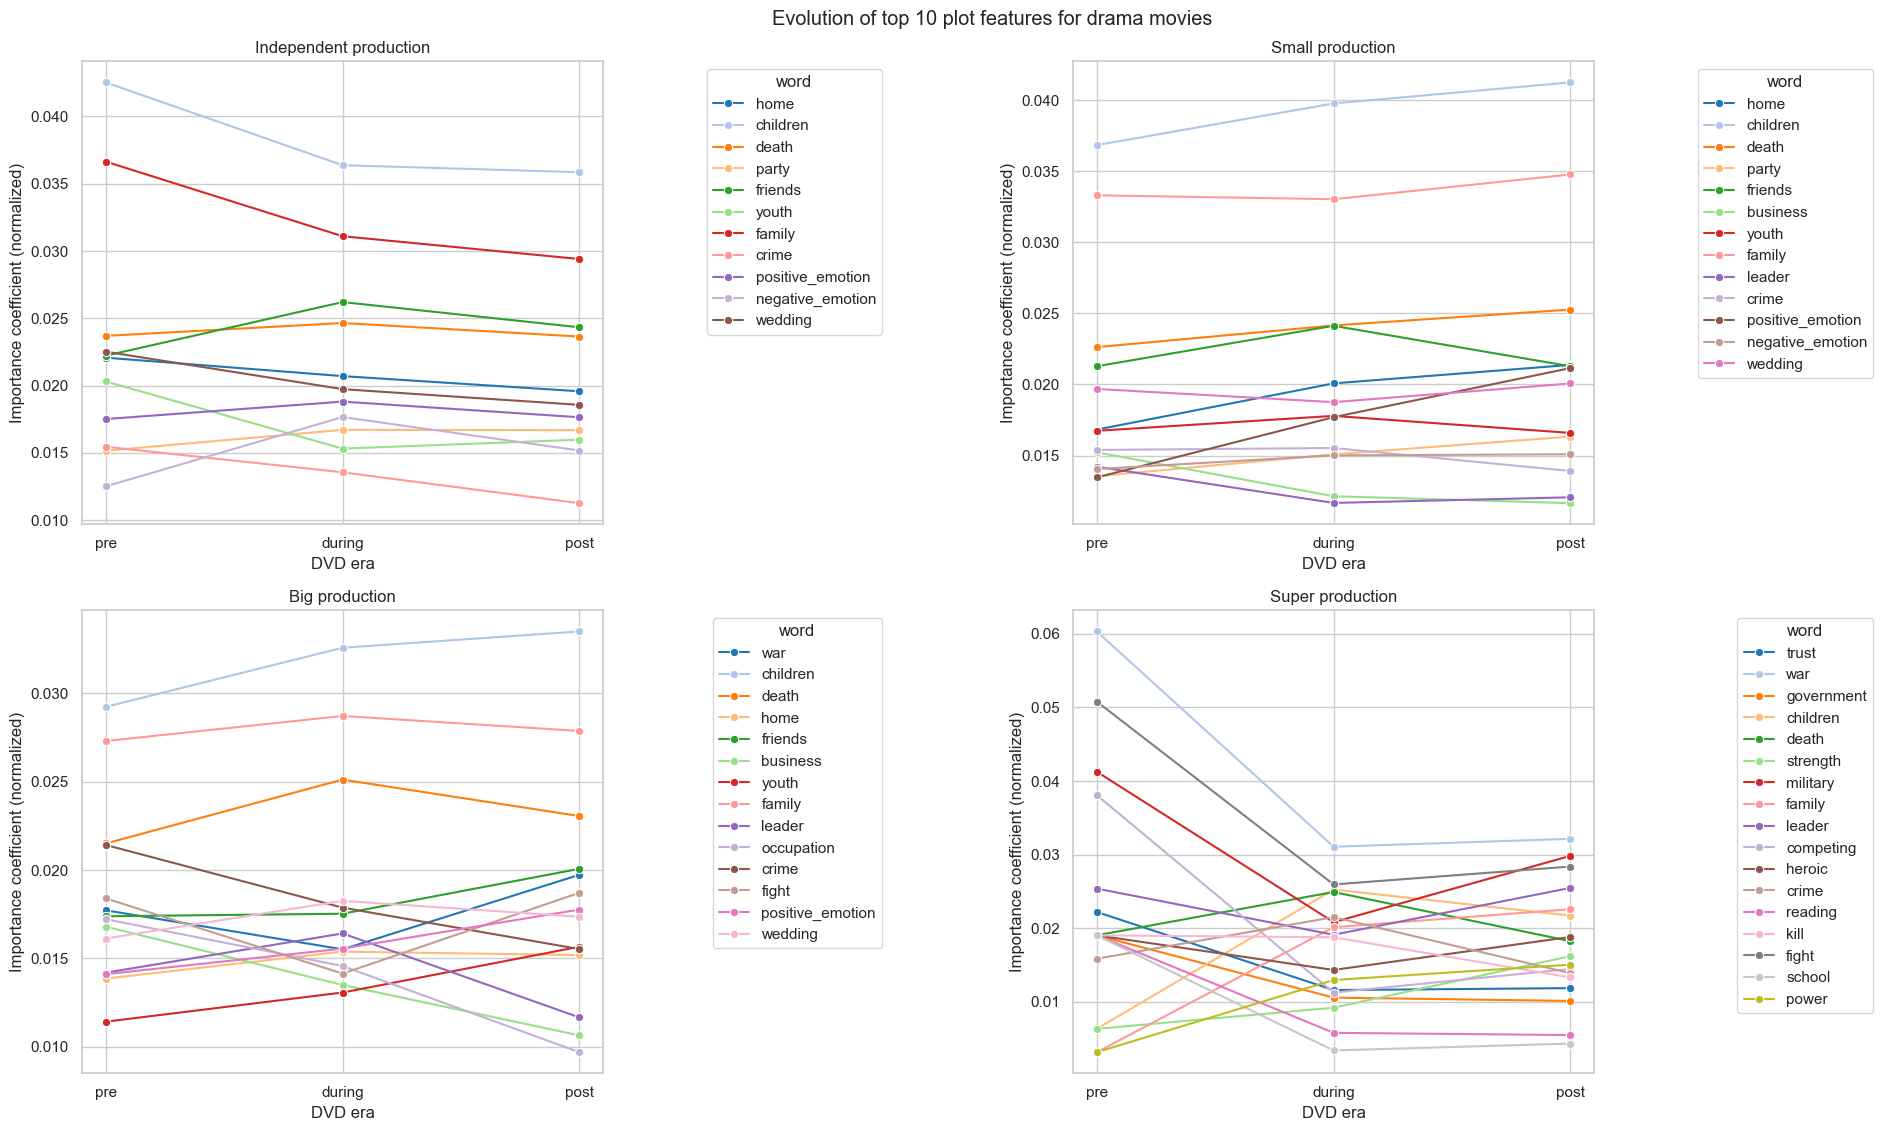

In [111]:
%run src/models/empath_model.py
empathModel = EmpathModel()
empathModel.plot_all_features(results, 'drama')


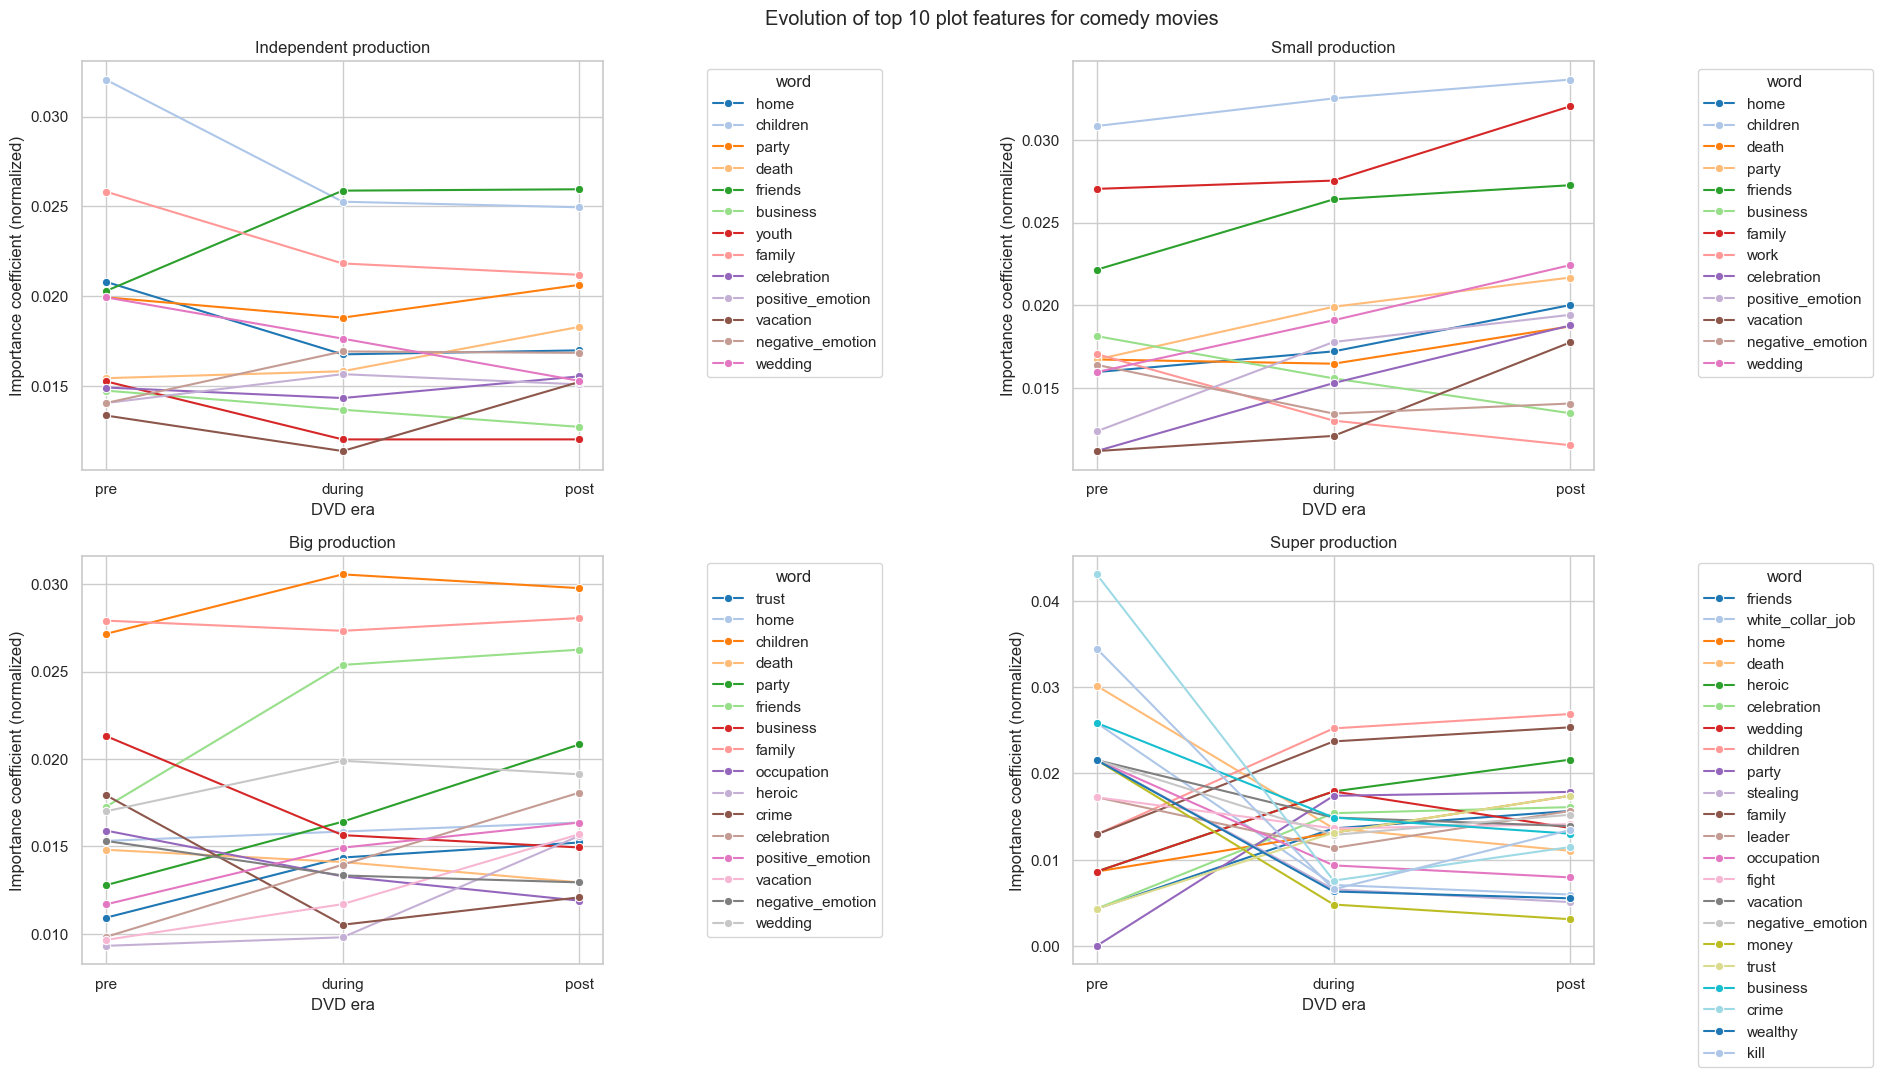

In [112]:
empathModel.plot_all_features(results, 'comedy')

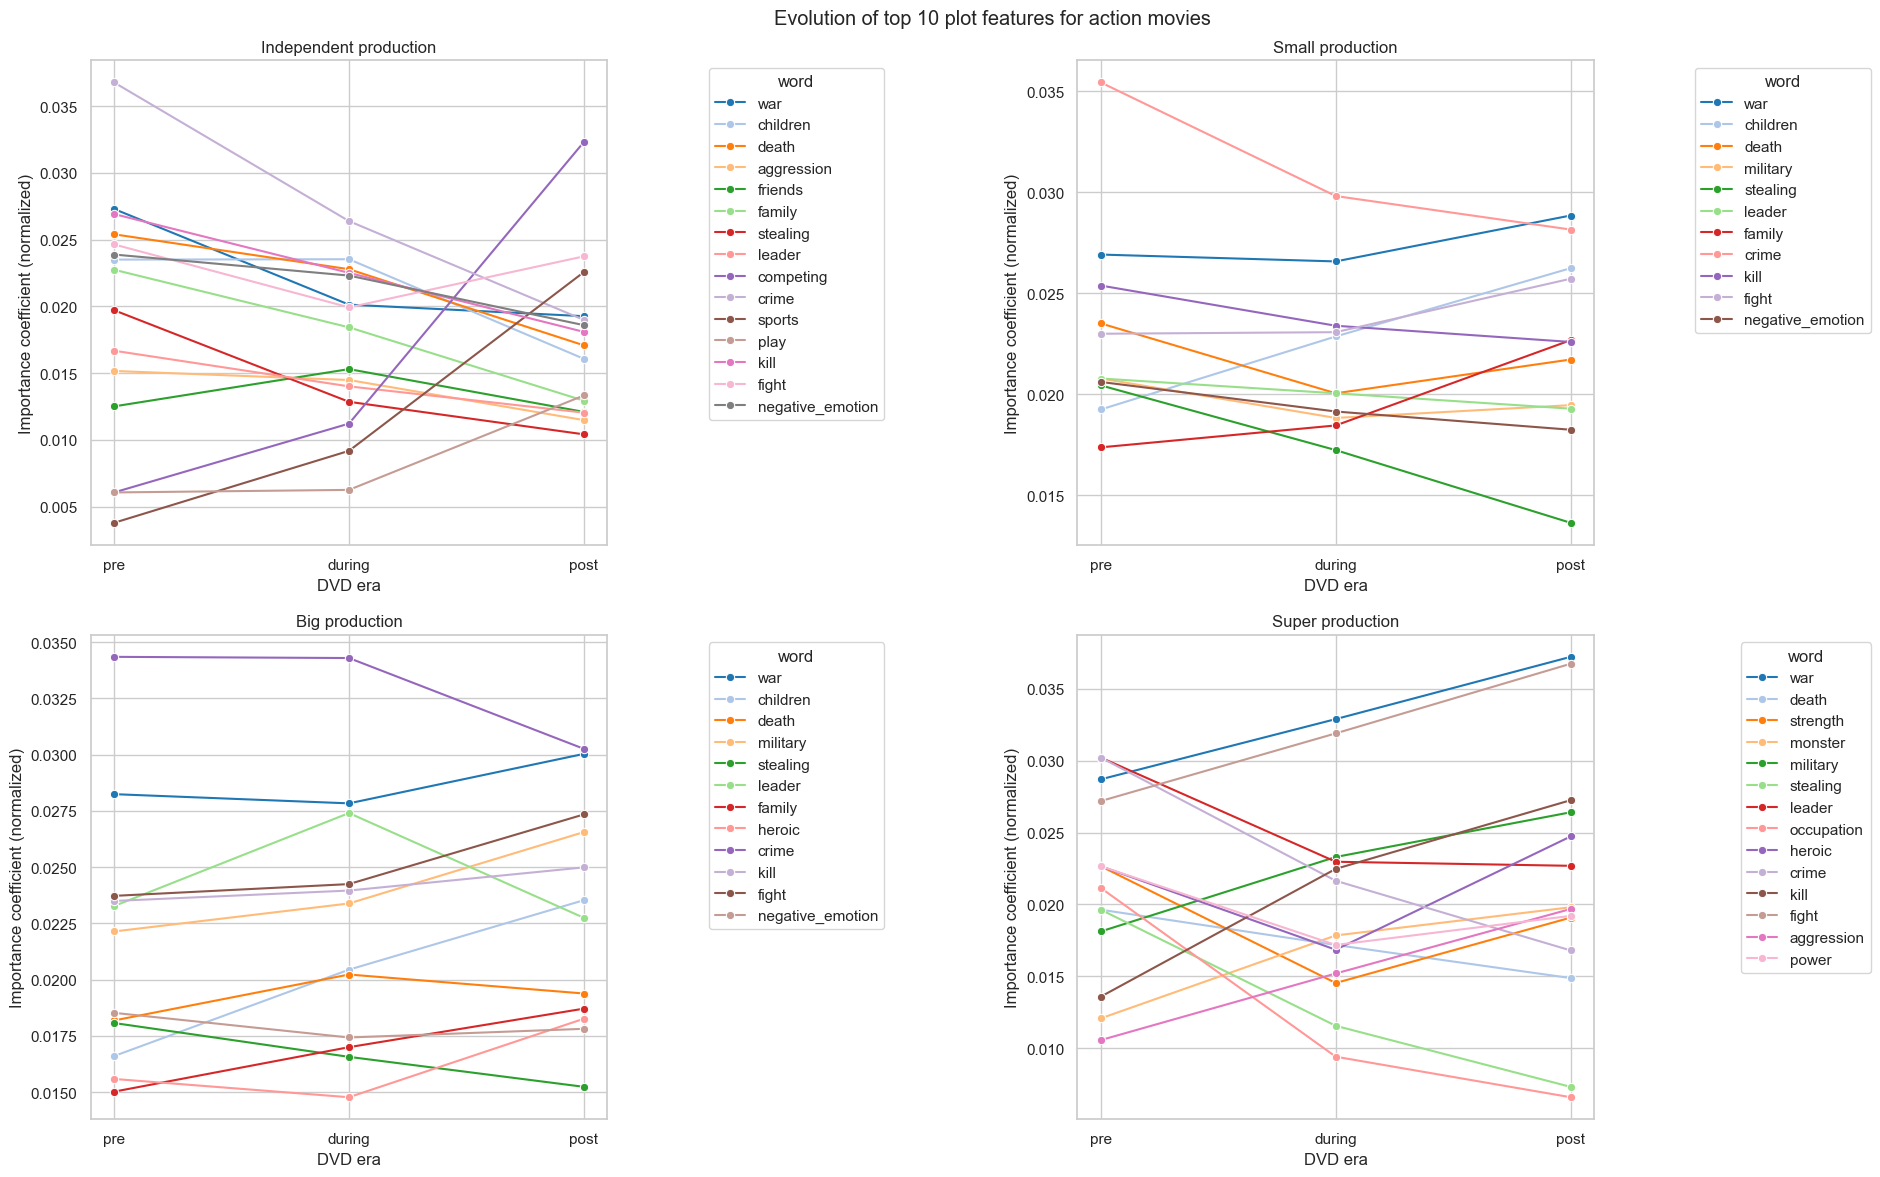

In [113]:
empathModel.plot_all_features(results, 'action')

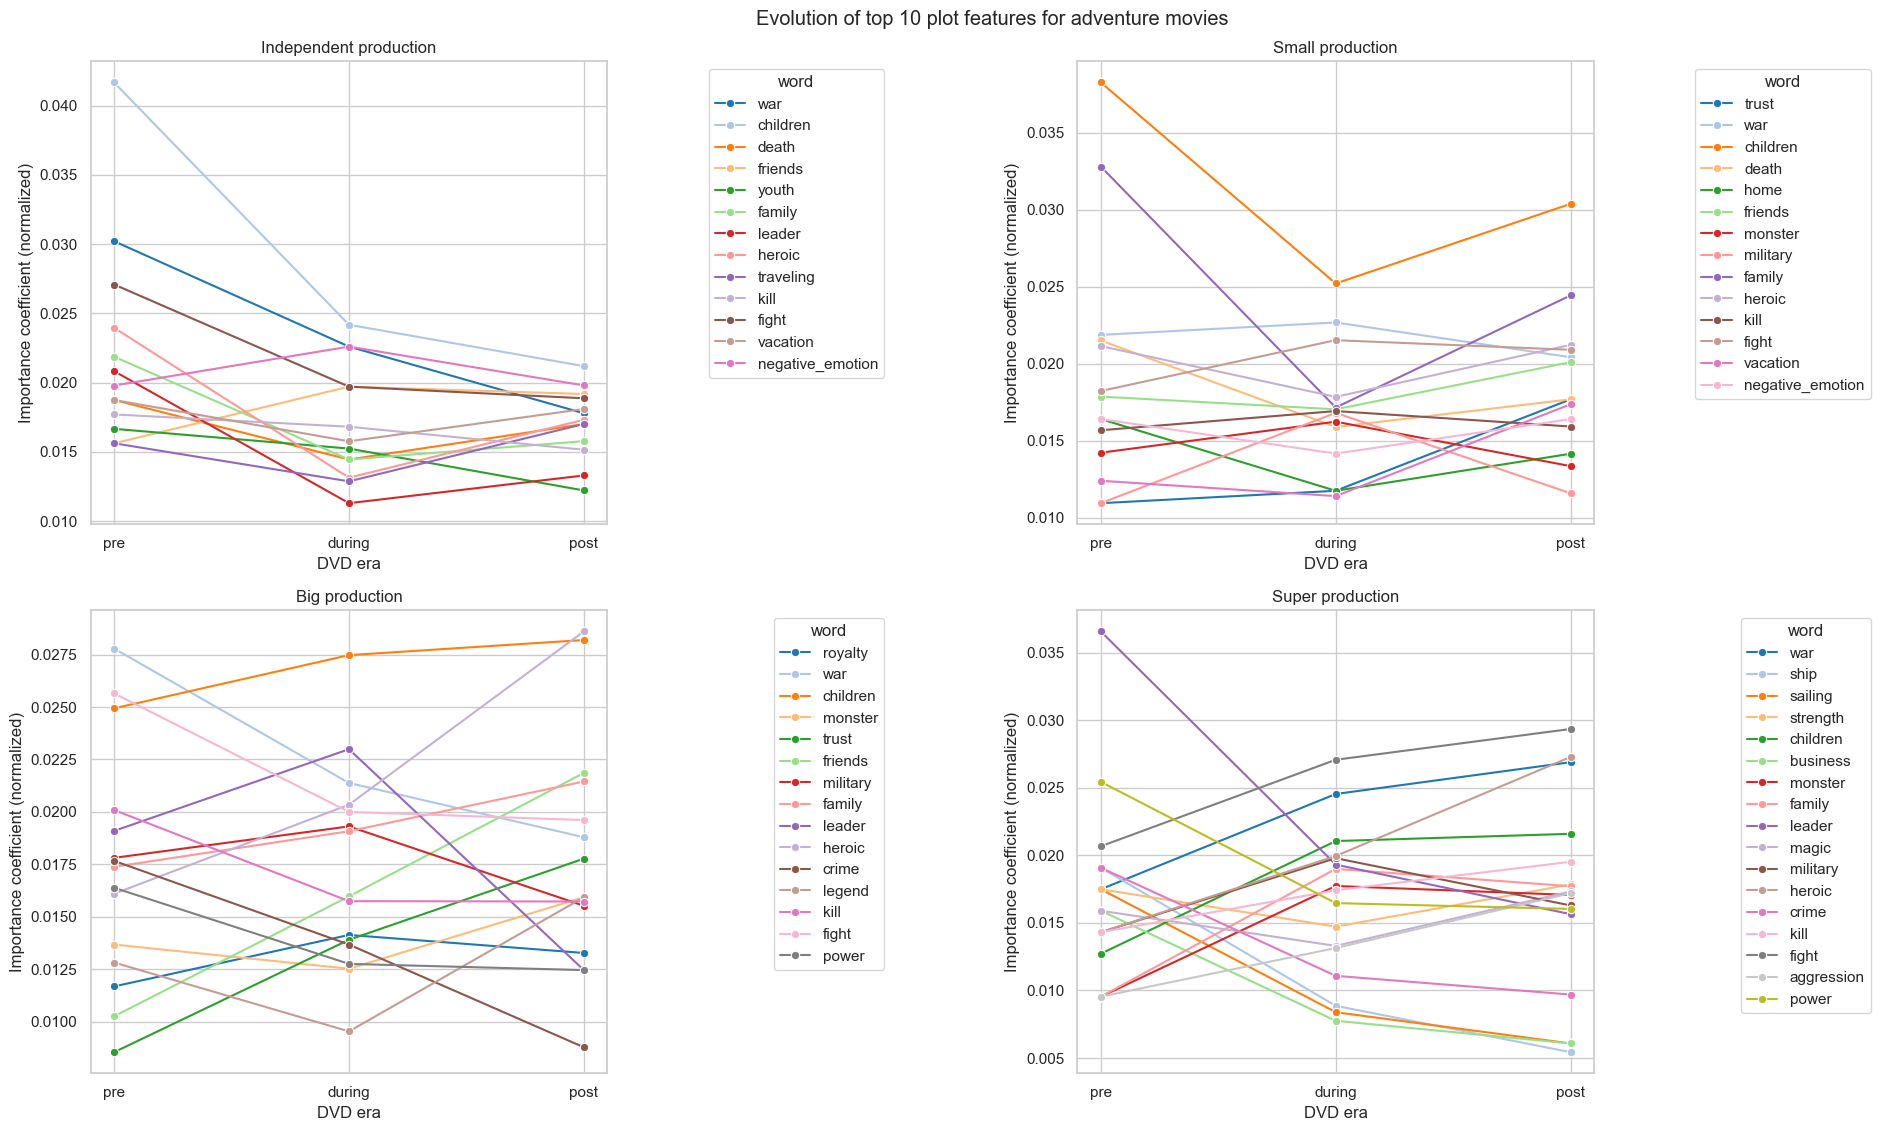

In [114]:
empathModel.plot_all_features(results, 'adventure')

In [191]:
import ipywidgets as widgets
from ipywidgets import interact

def dynamic_feature_plot(fixed_value):
    empathModel.plot_all_features(results, fixed_value)

# Create widgets for selection
prod_type_selector = widgets.Dropdown(
    options=results['genre'].unique(),
    description='Genre:'
)

interact(dynamic_feature_plot, fixed_value=prod_type_selector)
plt.show()

interactive(children=(Dropdown(description='Genre:', options=('drama', 'comedy', 'action', 'adventure'), value…

# Production countries

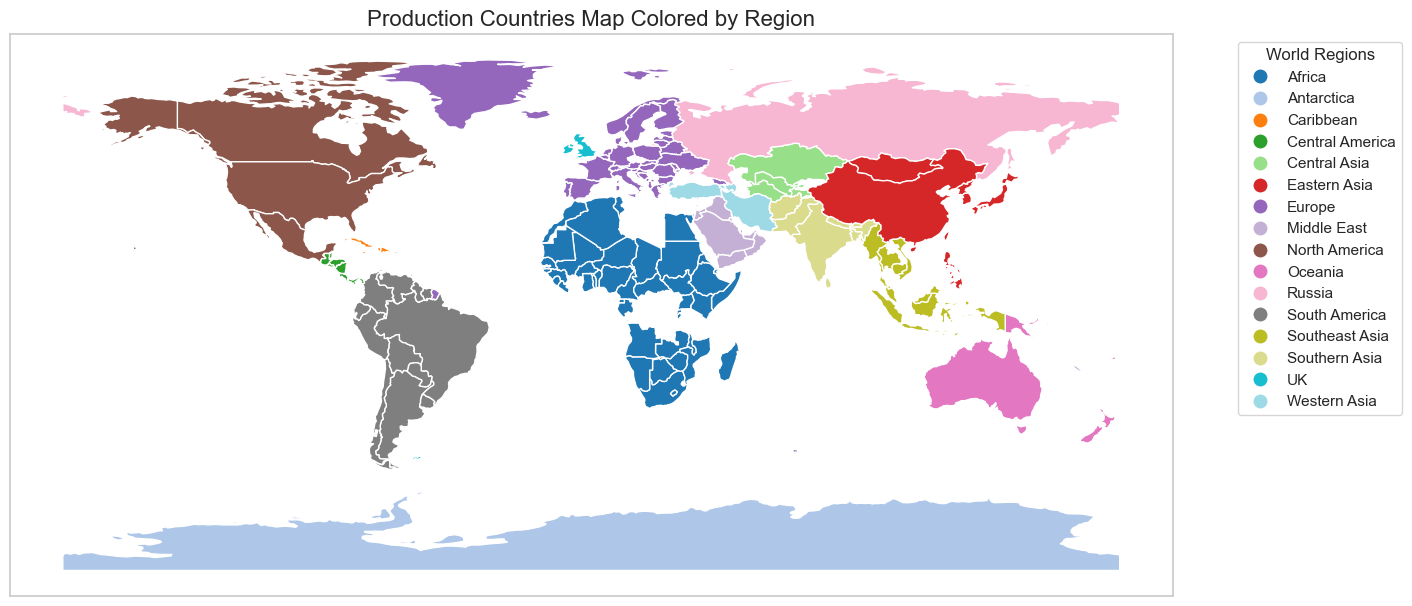

In [118]:
with open('./data/countries_to_region.json', 'r') as file:
    countries_regions = json.loads(file.read())
    
plot_world_map(countries_regions)

In [132]:
df_countries = df.copy().explode('production_countries')
df_countries = df_countries.explode('genres')
df_countries['region'] = df_countries.production_countries.apply(lambda x: countries_regions[x] if x in countries_regions and pd.notna(x) else None)
df_countries.dropna(subset=['region'], inplace=True)

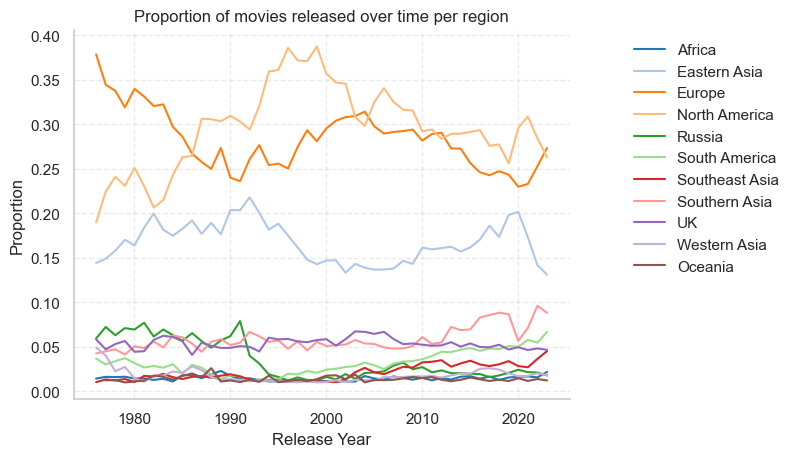

In [156]:
region_props = get_proportions(df_countries, ['release_year'], 'region')

# for website: 
# region_props = pd.read_csv('./data/website_data/region_props.csv')

sns.lineplot(data=region_props[region_props.prop > 0.01], x='release_year', y='prop', hue='region', palette='tab20')
plt.legend(loc='upper right', bbox_to_anchor=(1.45, 1), frameon=False)
style_plot('Proportion of movies released over time per region', 'Release Year', 'Proportion')
plt.show()

In [151]:
#region_props.to_csv('./data/website_data/region_props.csv', index=False)

In [157]:
selected_regions = list(region_props[region_props.prop > 0.05].region.unique())

In [185]:
df_countries_filtered = df_countries[(df_countries.region.isin(selected_regions))
                                     & (df_countries.budget > 0)]

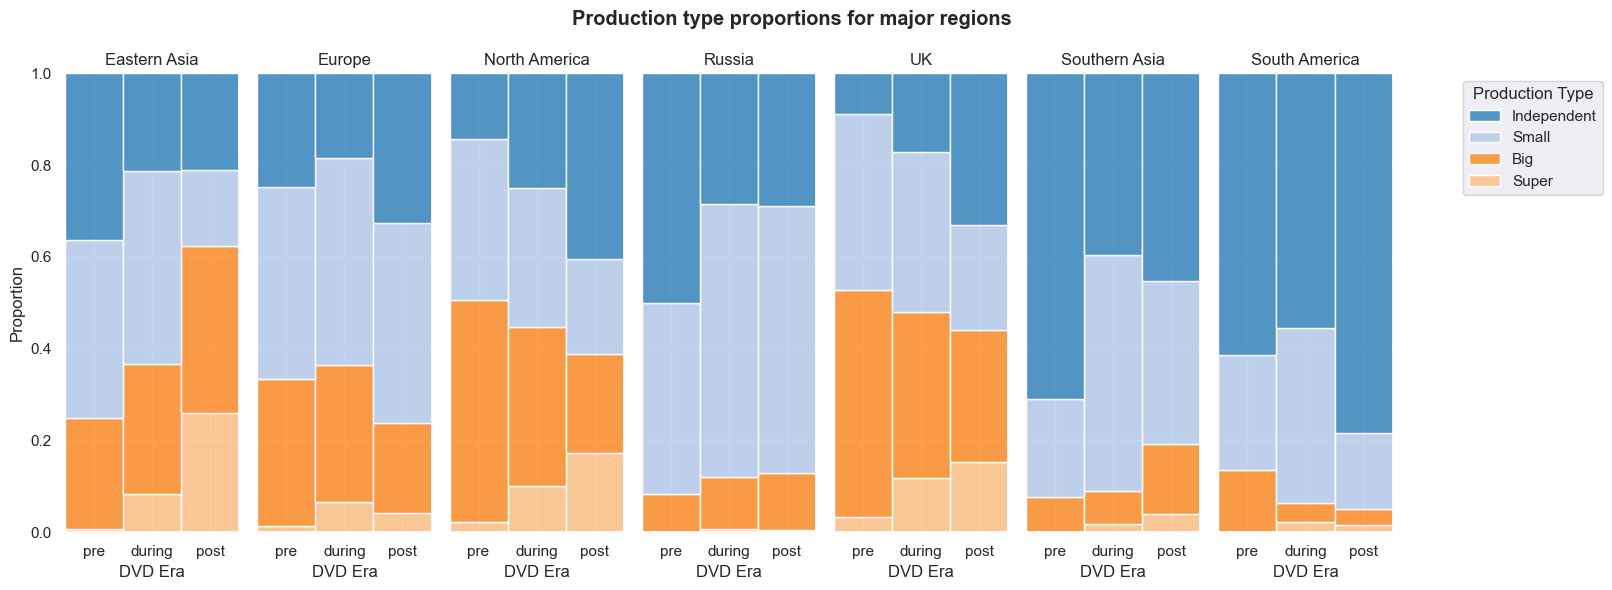

In [192]:
f, axs = plt.subplots(1, len(selected_regions), figsize=(16, 6), sharey=True)

for i, region in enumerate(selected_regions):
    ax = axs[i]
    legend = False if (i < len(selected_regions) - 1) else 'full'
    sns.histplot(data=df_countries_filtered[(df_countries_filtered['region'] == region)], x='dvd_era', hue='prod_type', 
                 multiple='fill', legend=legend, ax=ax, hue_order=['Independent', 'Small', 'Big', 'Super'], palette='tab20')
    ax.set_title(region)
    ax.set_ylabel('Proportion')
    ax.set_xlabel('DVD Era')
sns.move_legend(axs[len(selected_regions)-1], loc='upper right', bbox_to_anchor=(2.25,1),title='Production Type')
f.suptitle('Production type proportions for major regions', fontweight='bold')
plt.tight_layout()
plt.show()

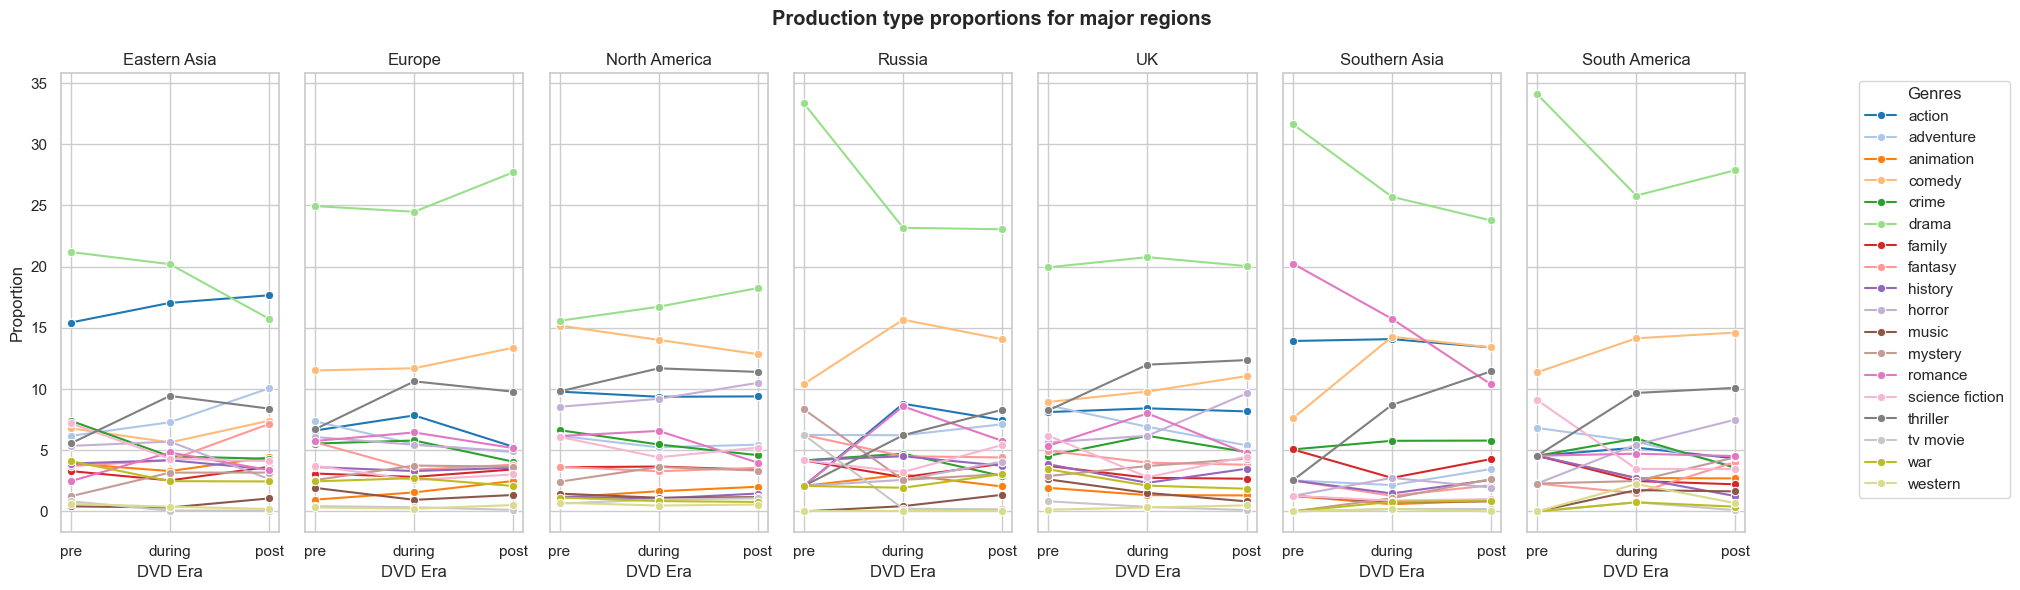

In [187]:
countries_genres_props = get_proportions(df_countries_filtered, ['dvd_era', 'region'], 'genres')

sns.set(style="whitegrid")
f, axs = plt.subplots(1, len(selected_regions), figsize=(20, 6), sharey=True)
# Loop through each production type
for i, region in enumerate(selected_regions):
    # Filter data for the current production type
    subset = countries_genres_props[countries_genres_props['region'] == region]
    subset.loc[:,'prop'] = subset['prop'].apply(lambda x : x*100)
    # Plot the evolution of proportions for genres across DVD eras
    ax = axs[i]
    legend = False if (i < len(selected_regions) - 1) else 'full'
    sns.lineplot(data=subset, x='dvd_era', y='prop', hue='genres', marker='o', ax=ax, legend=legend, palette='tab20')
    ax.set_ylabel('Proportion')
    ax.set_xlabel('DVD Era')
    ax.set_title(region)
        
sns.move_legend(axs[len(selected_regions)-1], loc='upper right', bbox_to_anchor=(2.25,1),title='Genres')
f.suptitle('Production type proportions for major regions', fontweight='bold')
plt.tight_layout()
plt.show()